# ForestFire

In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [4]:
forestfire = pd.read_csv('forestfires.csv')

In [5]:
forestfire.shape

(517, 31)

In [5]:
forestfire.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [7]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [10]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
forestfire['month'] = le.fit_transform(forestfire['month'])
forestfire['day'] = le.fit_transform(forestfire['day'])
forestfire['size_category'] = le.fit_transform(forestfire['size_category'])

In [11]:
forestfire.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      7    0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    5  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      7    0  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      7    3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0              1  
1         0              1  
2         0              1  
3         0              1  
4         0              1  

[5 rows x 31 columns]

In [19]:
# split data into X and Y
X = forestfire.drop(['size_category'], axis=1)
Y = forestfire['size_category']
X.shape, Y.shape

((517, 30), (517,))

In [23]:
# Build ANN model
model = Sequential()
model.add(layers.Dense(50, input_dim=30, activation='relu'))
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# fit the model
model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3778 - loss: 23.5625
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7698 - loss: 0.5474
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8398 - loss: 0.4591
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8826 - loss: 0.3223
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9183 - loss: 0.3063
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8819 - loss: 0.3286
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9305 - loss: 0.1890
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9364 - loss: 0.1970
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9653 - loss: 0.1538
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9589 - loss: 0.1319
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9581 - loss: 0.1132
Epoch 12/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [26]:
# evaluate the model
scores = model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 0.0107      
compile_metrics: 99.23%


# Gas Turbines

In [6]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines (1).csv


In [9]:
# load data
gasturbines_raw = pd.read_csv("gas_turbines.csv")
gasturbines_raw

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [10]:
gasturbines_raw.shape

(15039, 11)

In [11]:
gasturbines_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [12]:
gasturbines_raw.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

AT


AP


AH


AFDP


GTEP


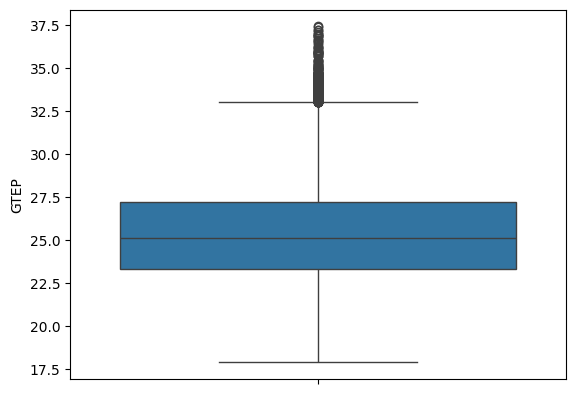

TIT


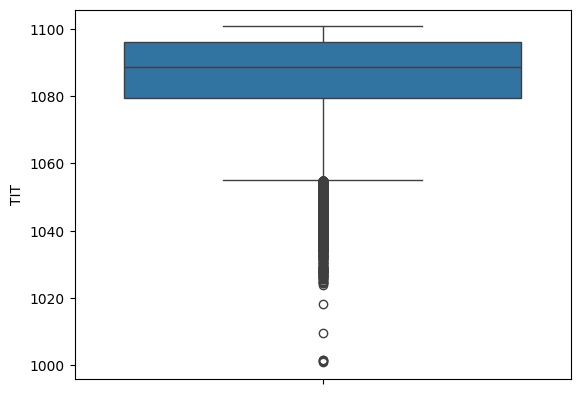

TAT


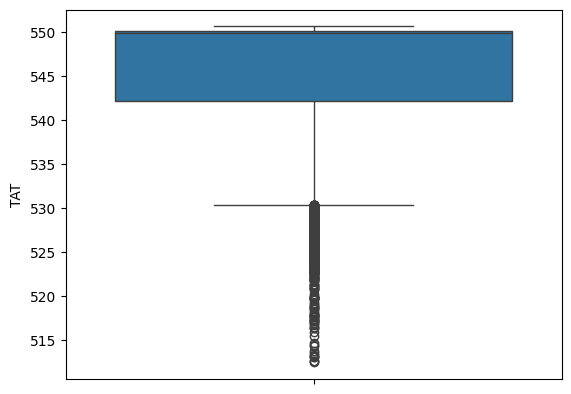

TEY


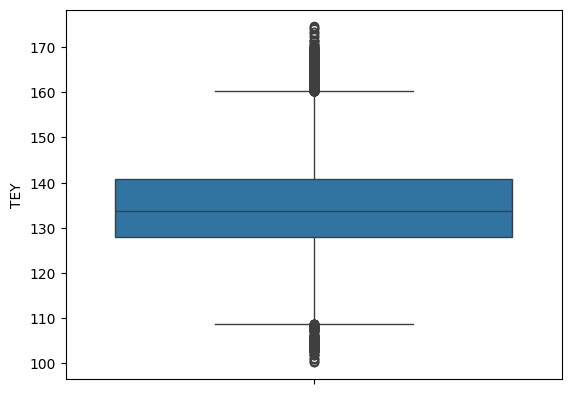

CDP


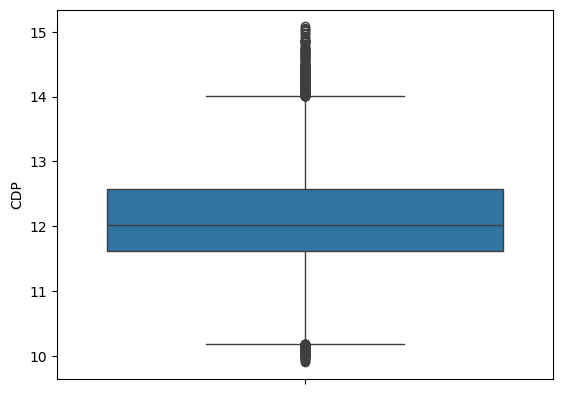

CO


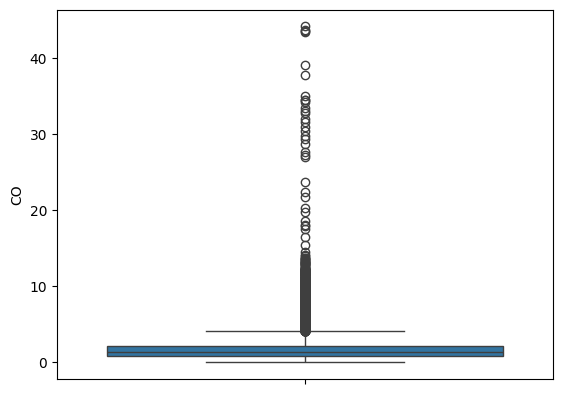

NOX


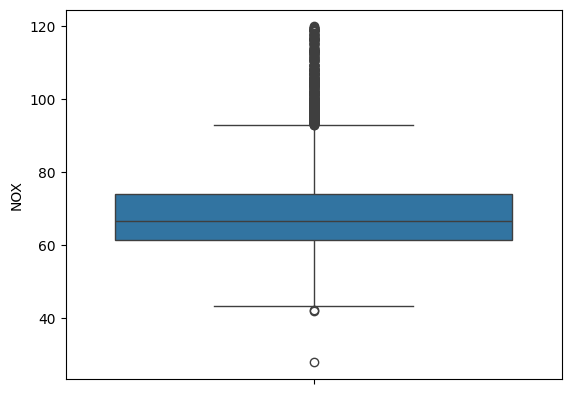

In [13]:
for i in gasturbines_raw.columns:
    print(i)
    sns.boxplot(gasturbines_raw[i])
    plt.show()

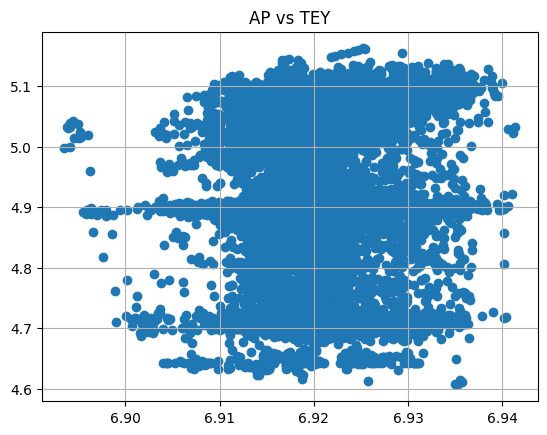

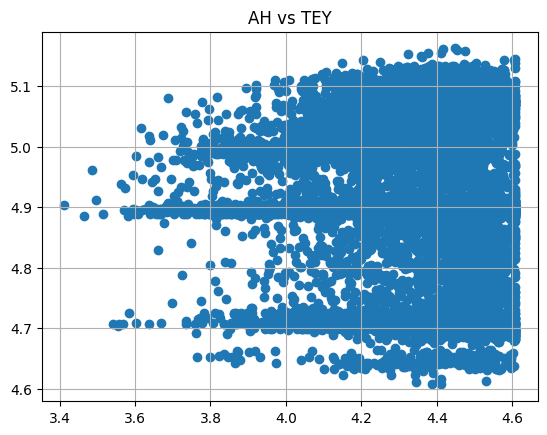

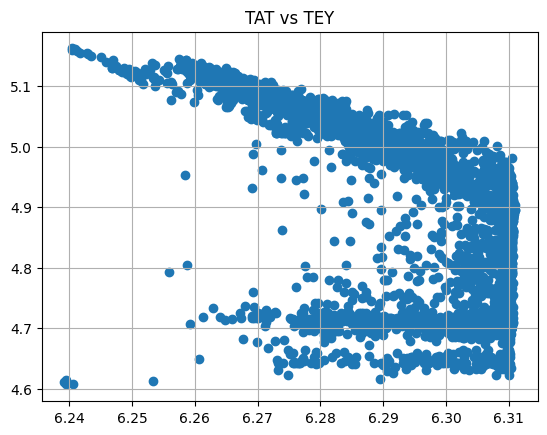

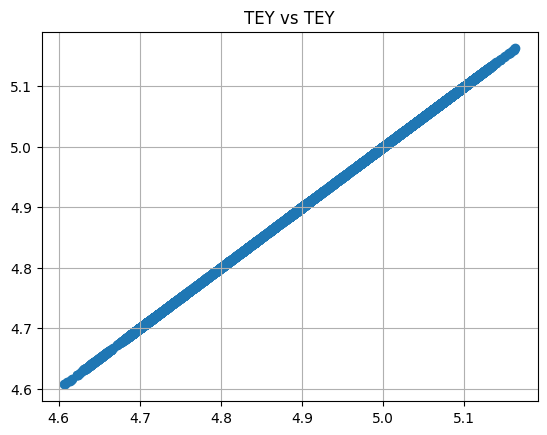

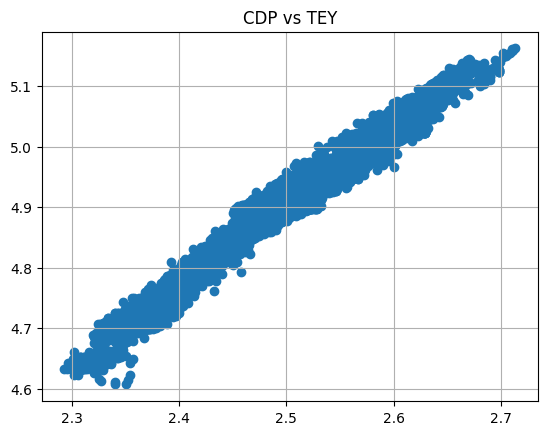

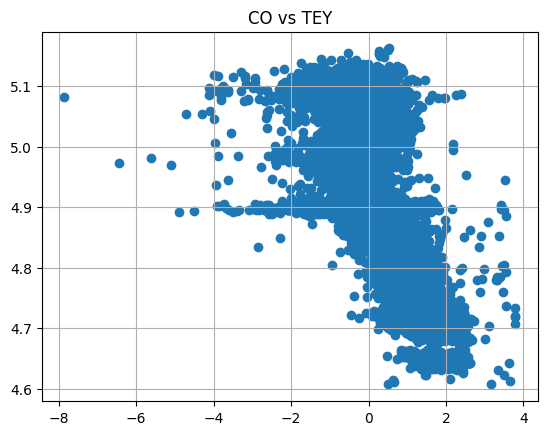

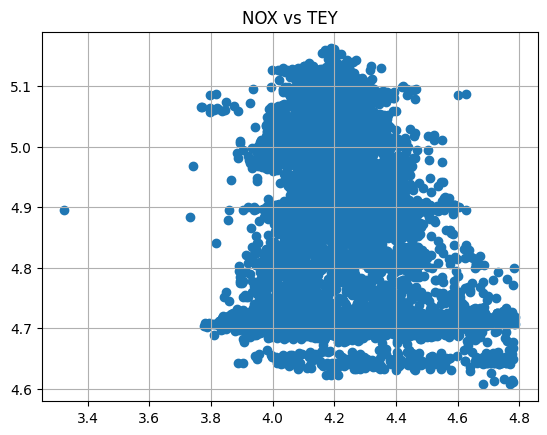

In [15]:
for i in gasturbines_raw.columns:
    plt.scatter(np.log(gasturbines_raw[i]), np.log(gasturbines_raw['TEY']))
    plt.title(i+ ' vs TEY')
    plt.grid()
    plt.show()

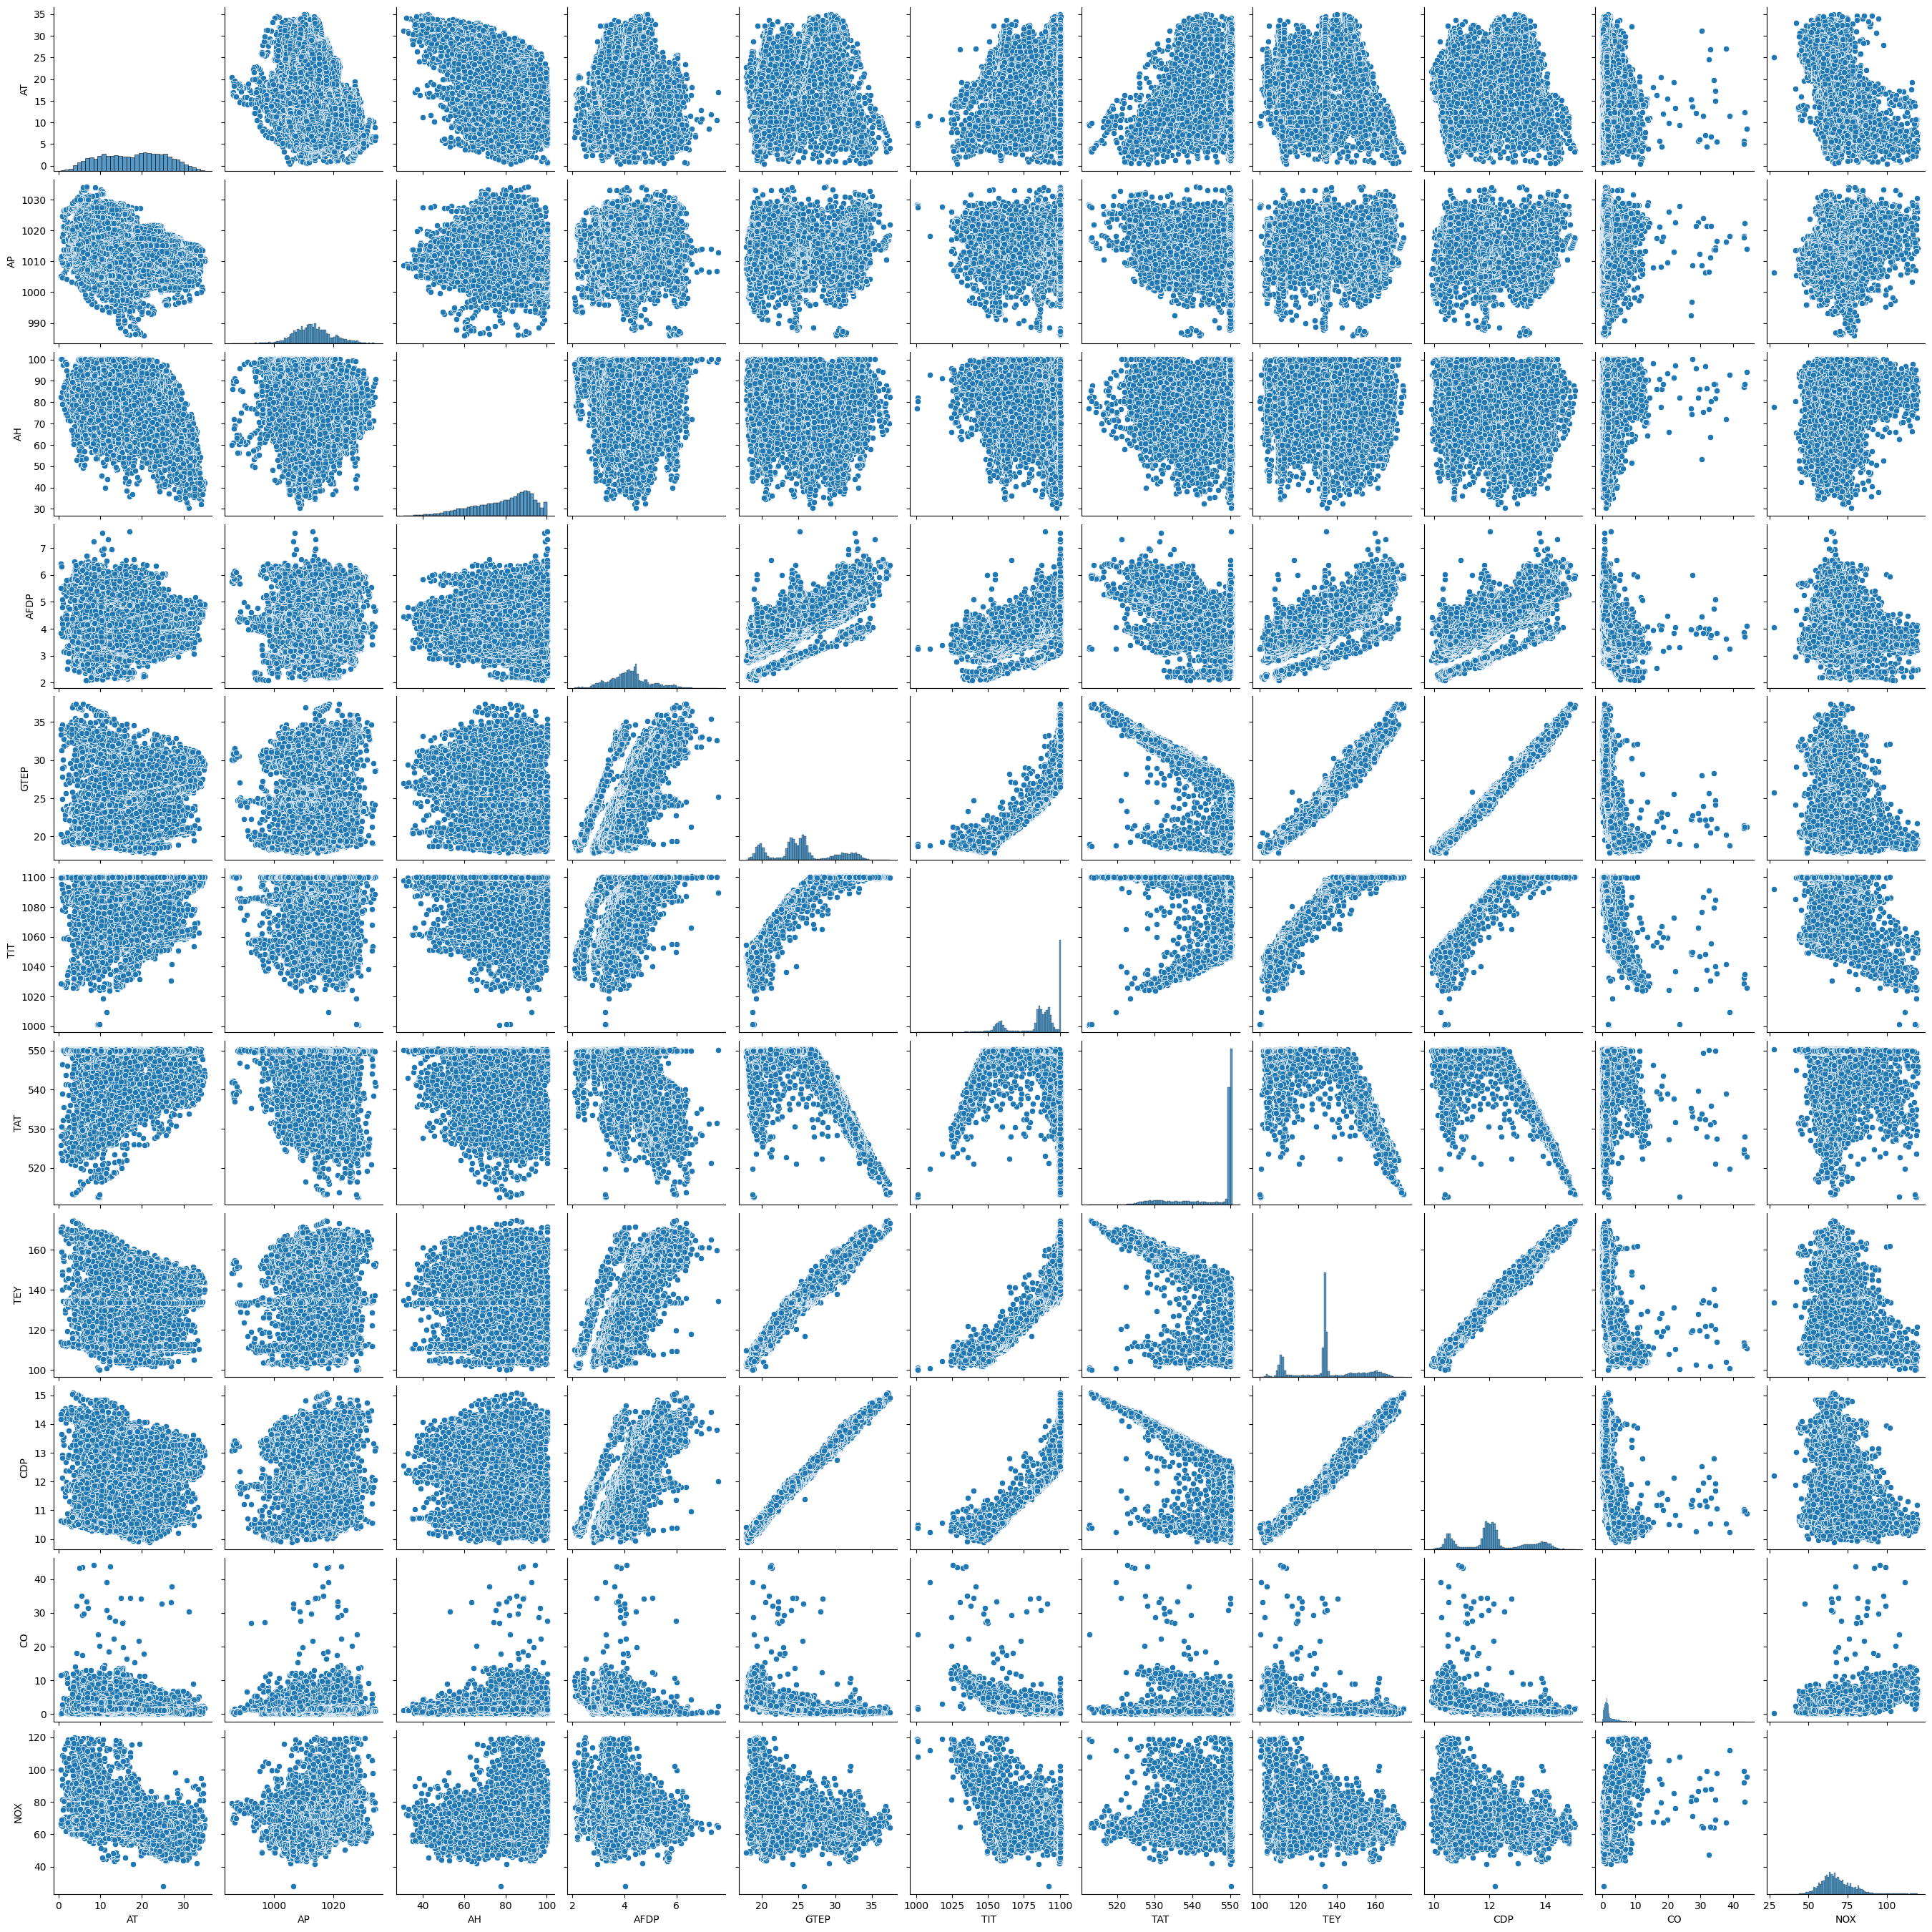

In [16]:
sns.pairplot(gasturbines_raw)

<Axes: ylabel='CO'>

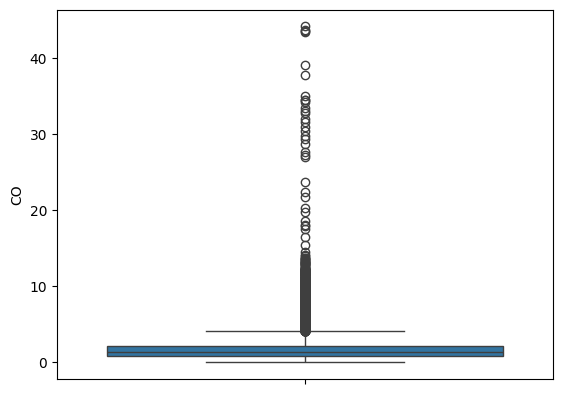

In [17]:
sns.boxplot(gasturbines_raw['CO'])

<Axes: ylabel='CO'>

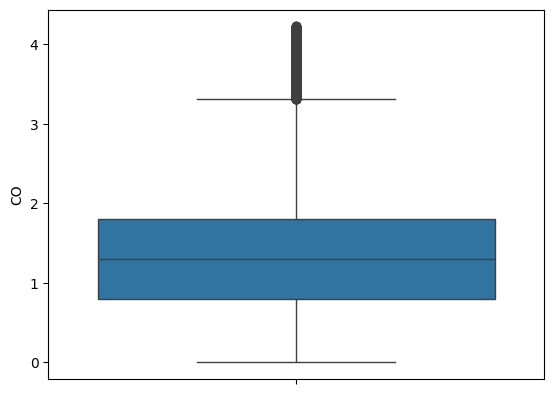

In [18]:
# Handling outliers of CO column
gasturbines = gasturbines_raw[gasturbines_raw['CO']<gasturbines_raw['CO'].quantile(.9)]
sns.boxplot(gasturbines['CO'])

In [19]:
x = gasturbines.drop(['TEY'], axis=1)
y = gasturbines['TEY']
x.shape, y.shape

((13535, 10), (13535,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.51628479, -1.62915155, -0.44746484, ..., -1.82908115,
         0.50795235,  0.36052212],
       [ 0.43593045, -0.44900443,  0.34307098, ..., -0.22250474,
        -0.13248432, -0.12127932],
       [ 1.22855197, -1.04694564, -1.45097451, ...,  0.89836252,
        -1.34642133, -0.59711843],
       ...,
       [ 1.00998294, -1.67635744, -0.87602065, ..., -0.22447118,
        -0.40022966, -2.36976246],
       [ 0.23868523, -1.4875339 ,  0.4856255 , ..., -0.08485438,
         0.26392689,  0.53079226],
       [ 1.10125924,  0.22761325, -1.24404054, ..., -0.13303201,
        -0.81567462,  0.13578847]])

In [22]:
input_size = len(x.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([

                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(output_size)


                                ])

In [23]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [24]:
num_epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/50
343/343 - 3s - 7ms/step - MeanSquaredError: 3438.4922 - loss: 3438.4922 - val_MeanSquaredError: 168.9780 - val_loss: 168.9780
Epoch 2/50
343/343 - 1s - 2ms/step - MeanSquaredError: 108.9185 - loss: 108.9185 - val_MeanSquaredError: 68.5123 - val_loss: 68.5123
Epoch 3/50
343/343 - 1s - 2ms/step - MeanSquaredError: 49.5322 - loss: 49.5322 - val_MeanSquaredError: 33.9408 - val_loss: 33.9408
Epoch 4/50
343/343 - 1s - 2ms/step - MeanSquaredError: 24.3211 - loss: 24.3211 - val_MeanSquaredError: 16.8095 - val_loss: 16.8095
Epoch 5/50
343/343 - 1s - 2ms/step - MeanSquaredError: 12.0961 - loss: 12.0961 - val_MeanSquaredError: 8.1448 - val_loss: 8.1448
Epoch 6/50
343/343 - 1s - 2ms/step - MeanSquaredError: 6.2360 - loss: 6.2360 - val_MeanSquaredError: 4.5051 - val_loss: 4.5051
Epoch 7/50
343/343 - 1s - 3ms/step - MeanSquaredError: 3.6826 - loss: 3.6826 - val_MeanSquaredError: 2.6155 - val_loss: 2.6155
Epoch 8/50
343/343 - 1s - 3ms/step - MeanSquaredError: 2.4231 - loss: 2.4231 - val_Me

In [25]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MeanSquaredError: 0.9240 - loss: 0.9240


In [26]:
predictions = model.predict_on_batch(X_test_scaled)

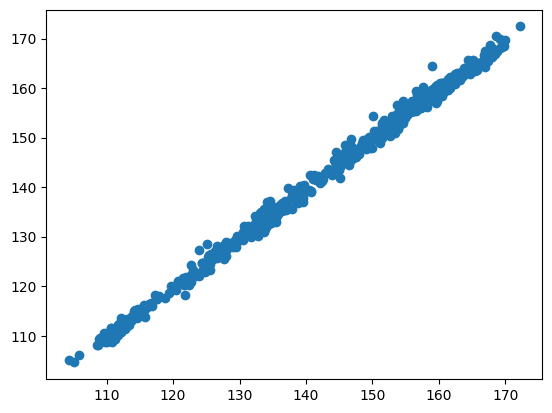

In [27]:
plt.scatter(y_test, predictions)

In [28]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

Actual   Predicted   % Error
0     110.74  109.159195  1.427492
1     134.79  134.293137  0.368620
2     146.52  146.737854  0.148686
3     133.74  133.552536  0.140170
4     139.62  137.825195  1.285493
...      ...         ...       ...
1349  130.13  129.231201  0.690693
1350  154.85  154.453796  0.255863
1351  131.45  131.185791  0.200996
1352  135.04  134.073105  0.716006
1353  134.75  133.268463  1.099471

[1354 rows x 3 columns]